In [3]:
from tensorflow.keras.datasets import imdb 
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score, recall_score,f1_score
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout,Dense
from tensorflow.keras.models import Sequential
from sklearn.tree import DecisionTreeClassifier, plot_tree
from pandas_profiling import ProfileReport
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

In [4]:
data=pd.read_csv("diabetic1.csv")

In [5]:
data.head()


,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Age,Outcome,Gender,Country,Family_History,Obesity
0,6,148,72,35,0,33.6,50,positive,Male,Russia,No,No
1,1,85,66,29,0,26.6,31,negative,Male,Germany,No,No
2,8,183,64,0,0,23.3,32,positive,Male,Nigeria,No,No
3,1,89,66,23,94,28.1,21,negative,Female,India,No,No
4,0,137,40,35,168,43.1,33,positive,Female,Germany,Yes,No


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


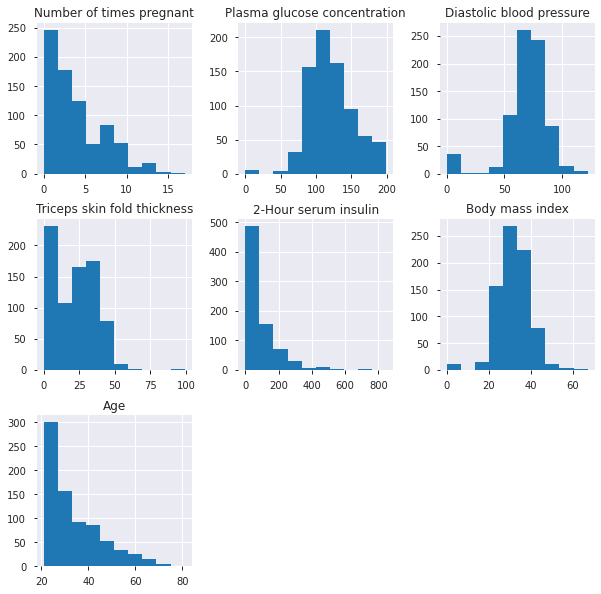

In [6]:
data.hist(bins=10,figsize=(10,10))
plt.show()

In [5]:
print(data.isnull().values.any())

False


In [6]:
profile = ProfileReport(data)
profile

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


In [7]:
data.shape


(768, 12)

In [8]:
cols_with_zeros = ['Plasma glucose concentration', "Diastolic blood pressure", "Triceps skin fold thickness", "2-Hour serum insulin", "Body mass index"]
for col in cols_with_zeros:
    data[col].replace(0, np.nan, inplace=True)
data.fillna(data.median(), inplace=True)

In [9]:
data.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Age,Outcome,Gender,Country,Family_History,Obesity
0,6,148.0,72.0,35.0,125.0,33.6,50,positive,Male,Russia,No,No
1,1,85.0,66.0,29.0,125.0,26.6,31,negative,Male,Germany,No,No
2,8,183.0,64.0,29.0,125.0,23.3,32,positive,Male,Nigeria,No,No
3,1,89.0,66.0,23.0,94.0,28.1,21,negative,Female,India,No,No
4,0,137.0,40.0,35.0,168.0,43.1,33,positive,Female,Germany,Yes,No


In [10]:

data.shape

(768, 12)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Number of times pregnant      768 non-null    int64  
 1   Plasma glucose concentration  768 non-null    float64
 2   Diastolic blood pressure      768 non-null    float64
 3   Triceps skin fold thickness   768 non-null    float64
 4   2-Hour serum insulin          768 non-null    float64
 5   Body mass index               768 non-null    float64
 6   Age                           768 non-null    int64  
 7   Outcome                       768 non-null    object 
 8   Gender                        768 non-null    object 
 9   Country                       768 non-null    object 
 10  Family_History                768 non-null    object 
 11  Obesity                       768 non-null    object 
dtypes: float64(5), int64(2), object(5)
memory usage: 72.1+ KB


In [12]:
data.describe()


,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,33.240885
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,21.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,24.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,81.000000


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


negative    500
positive    268
Name: Outcome, dtype: int64


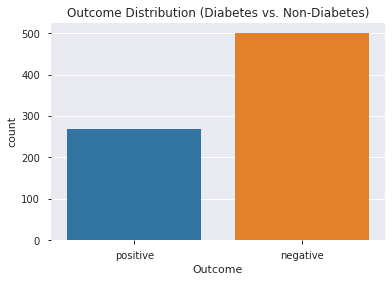

In [13]:
print(data["Outcome"].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x=data['Outcome'])
plt.title("Outcome Distribution (Diabetes vs. Non-Diabetes)")
plt.show()

New class distribution after upsampling:
negative    500
positive    450
Name: Outcome, dtype: int64


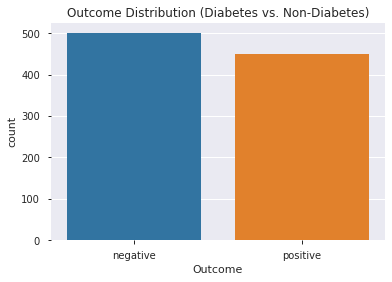

In [14]:
majority = data[data["Outcome"] == "negative"]
minority = data[data["Outcome"] == "positive"]
if minority.empty or majority.empty:
    print("Error: One of the classes is missing in the dataset.")
else:
    # Upsample minority class
    minority_upsampled = resample(minority, 
                                     replace=True, 
                                     n_samples=450, 
                                     random_state=42)

    # Combine datasets
    data_upsampled = pd.concat([majority, minority_upsampled])

    # Shuffle the dataset
    data1 = data_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

    # Print final class distribution
    print("New class distribution after upsampling:")
    print(data1["Outcome"].value_counts())
    plt.figure(figsize=(6,4))
sns.countplot(x=data1['Outcome'])
plt.title("Outcome Distribution (Diabetes vs. Non-Diabetes)")
plt.show()

In [15]:
(data1.isnull().values.any())

False

In [16]:
data1.shape


(950, 12)

In [17]:
data1.head()


,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Age,Outcome,Gender,Country,Family_History,Obesity
0,10,179.0,70.0,29.0,125.0,35.1,37,negative,Female,Nigeria,No,No
1,7,103.0,66.0,32.0,125.0,39.1,31,positive,Female,Russia,No,No
2,1,128.0,48.0,45.0,194.0,40.5,24,positive,Male,Nigeria,No,Yes
3,4,117.0,62.0,12.0,125.0,29.7,30,positive,Female,India,No,No
4,4,123.0,62.0,29.0,125.0,32.0,35,positive,Female,China,No,No


In [18]:
data1.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Age
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,4.162105,124.053684,73.172632,29.603158,145.016842,32.774211,34.151579
std,3.587097,29.644829,12.050460,8.393095,86.608720,6.821739,11.678796
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,21.000000
25%,1.000000,102.000000,66.000000,26.250000,125.000000,28.000000,24.000000
50%,3.000000,121.000000,72.000000,29.000000,125.000000,32.400000,30.500000
75%,7.000000,144.000000,80.000000,33.000000,138.750000,36.775000,42.000000
max,17.000000,199.000000,122.000000,63.000000,744.000000,67.100000,81.000000


In [19]:
x1=data1.iloc[:,:7]

In [20]:
x1.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Age
0,10,179.0,70.0,29.0,125.0,35.1,37
1,7,103.0,66.0,32.0,125.0,39.1,31
2,1,128.0,48.0,45.0,194.0,40.5,24
3,4,117.0,62.0,12.0,125.0,29.7,30
4,4,123.0,62.0,29.0,125.0,32.0,35


In [21]:
name = "Outcome"
y1 = data1[name].map({"negative":0,"positive":1})

In [22]:
y1.value_counts()

0    500
1    450
Name: Outcome, dtype: int64

<AxesSubplot:>

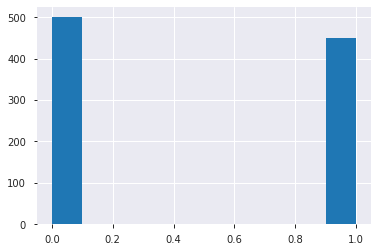

In [23]:
y1.hist()


In [24]:
y1.head()

0    0
1    1
2    1
3    1
4    1
Name: Outcome, dtype: int64

In [25]:
x1.shape


(950, 7)

In [26]:
y1.shape

(950,)

In [27]:
numeric_features = ["Age","Diastolic blood pressure","Plasma glucose concentration","Triceps skin fold thickness","2-Hour serum insulin","Body mass index","Number of times pregnant"]
categorical_features = ["Gender","Country","Family_History","Obesity"]
features = numeric_features + categorical_features

In [28]:
features

['Age',
 'Diastolic blood pressure',
 'Plasma glucose concentration',
 'Triceps skin fold thickness',
 '2-Hour serum insulin',
 'Body mass index',
 'Number of times pregnant',
 'Gender',
 'Country',
 'Family_History',
 'Obesity']

In [29]:
for i in categorical_features:
    print(data1[i].value_counts())
    


Female    579
Male      371
Name: Gender, dtype: int64
India          217
China          161
Nigeria        131
Russia          90
Japan           76
Brazil          68
South Korea     66
Germany         56
UK              47
USA             38
Name: Country, dtype: int64
No     673
Yes    277
Name: Family_History, dtype: int64
No     651
Yes    299
Name: Obesity, dtype: int64


In [30]:
X_df=data1[features]

In [31]:

numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")),
           ("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
#         ("selector", SelectPercentile(chi2, percentile=50)),
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [32]:
X = preprocessor.fit_transform(X_df)

In [33]:
# Train-Test Split 80 & 20

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=0)


In [34]:
y_train.shape

(760,)

In [35]:
X_train.shape

(760, 23)

In [36]:
y_test.shape

(190,)

# Create a Model & Using Neural Network

In [40]:
 # Build Deep Learning Model
model = keras.models.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=X_train.shape[1:]),
    #keras.layers.BatchNormalization(),  # Batch Normalization
      Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
   # keras.layers.BatchNormalization(),
      Dropout(0.3),
   keras.layers.Dense(1, activation='sigmoid')
])

In [41]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1536      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 3,649
Trainable params: 3,649
Non-trainable params: 0
_________________________________________________________________


In [42]:
adam = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss="binary_crossentropy",
              optimizer=adam,
              metrics=["accuracy"])

In [43]:
history = model.fit(X_train , y_train, epochs=50,batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/50
24/24 [==============================] - 1s 11ms/step - loss: 0.6732 - accuracy: 0.5526 - val_loss: 0.6036 - val_accuracy: 0.7263
Epoch 2/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6011 - accuracy: 0.6868 - val_loss: 0.5447 - val_accuracy: 0.7368
Epoch 3/50
24/24 [==============================] - 0s 3ms/step - loss: 0.5739 - accuracy: 0.7026 - val_loss: 0.5164 - val_accuracy: 0.7526
Epoch 4/50
24/24 [==============================] - 0s 3ms/step - loss: 0.5414 - accuracy: 0.7197 - val_loss: 0.4979 - val_accuracy: 0.7526
Epoch 5/50
24/24 [==============================] - 0s 3ms/step - loss: 0.5229 - accuracy: 0.7500 - val_loss: 0.4857 - val_accuracy: 0.7579
Epoch 6/50
24/24 [==============================] - 0s 3ms/step - loss: 0.5067 - accuracy: 0.7447 - val_loss: 0.4758 - val_accuracy: 0.7474
Epoch 7/50
24/24 [==============================] - 0s 3ms/step - loss: 0.5129 - accuracy: 0.7447 - val_loss: 0.4694 - val_accuracy: 0.7632
Epoch 8/50
24/24 [=

6/6 [==============================] - 0s 1ms/step - loss: 0.3613 - accuracy: 0.8526
Final Training Accuracy: 86.18%
Final Validation Accuracy: 85.26%
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       106
           1       0.81      0.87      0.84        84

    accuracy                           0.85       190
   macro avg       0.85      0.85      0.85       190
weighted avg       0.86      0.85      0.85       190

Confusion Matrix 
 [[89 17]
 [11 73]]


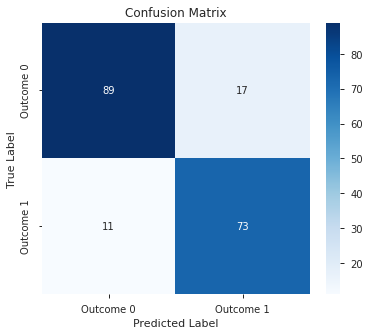

In [44]:
loss, accuracy = model.evaluate(X_test, y_test)

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print(f"Final Training Accuracy: {train_acc[-1] * 100:.2f}%")
print(f"Final Validation Accuracy: {val_acc[-1] * 100:.2f}%")

y_pred_probs = model.predict(X_test)

# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_probs > 0.5).astype("int32")
print(classification_report(y_test,y_pred ))
# Generate the confusion matrix
cm = confusion_matrix(y_test,y_pred )

# Create the heatmap
plt.figure(figsize=(6, 5))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Outcome 0", "Outcome 1"], yticklabels=["Outcome 0", "Outcome 1"])

# Labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
print("Confusion Matrix","\n",cm)
# Explicitly show the plot
plt.show()

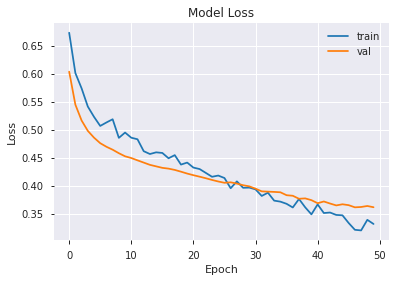

In [45]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

AUC: 0.91


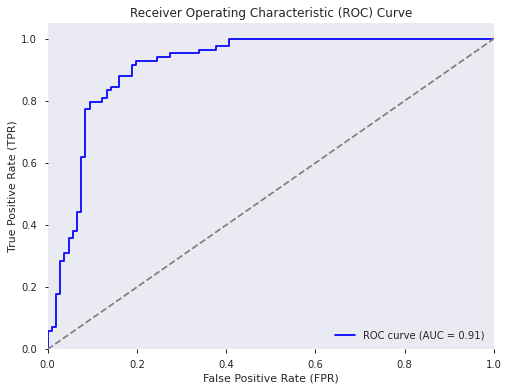

In [46]:
# Import necessary libraries
from sklearn.metrics import roc_curve, auc


# Get model predictions (probability output)
y_pred_prob = model.predict(X_test)  # Use model.predict() for probability

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Random line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Logistic Regression Model


In [47]:
# Train-Test Split 80 & 20

X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=0)

Training Accuracy: 72.37%
Test Accuracy: 76.32%
              precision    recall  f1-score   support

           0       0.84      0.72      0.77       106
           1       0.70      0.82      0.75        84

    accuracy                           0.76       190
   macro avg       0.77      0.77      0.76       190
weighted avg       0.77      0.76      0.76       190

Confusion Matrix 
 [[76 30]
 [15 69]]


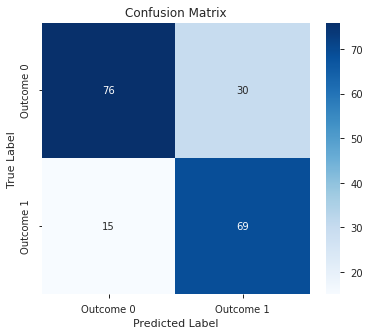

In [48]:
# Initialize and train Logistic Regression model
lg_model =  LogisticRegression(max_iter=1000, random_state=42)
lg_model.fit(X_train, y_train)

# Predict on training 
y_train_pred = lg_model.predict(X_train)
# Get predicted probabilities
y_test_probs = lg_model.predict_proba(X_test)[:, 1]  # Probabilities for Class 1
# Define a new threshold (adjust based on performance)
new_threshold = 0.4
# Apply new threshold
y_test_pred_new = (y_test_probs >= new_threshold).astype(int)
# Compute accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred_new )

# Print results
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(classification_report(y_test,y_test_pred_new  ))
# Compute confusion matrix
cm = confusion_matrix(y_test,y_test_pred_new )

# Create the heatmap
plt.figure(figsize=(6, 5))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Outcome 0", "Outcome 1"], yticklabels=["Outcome 0", "Outcome 1"])

# Labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
print("Confusion Matrix","\n",cm)
# Explicitly show the plot
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

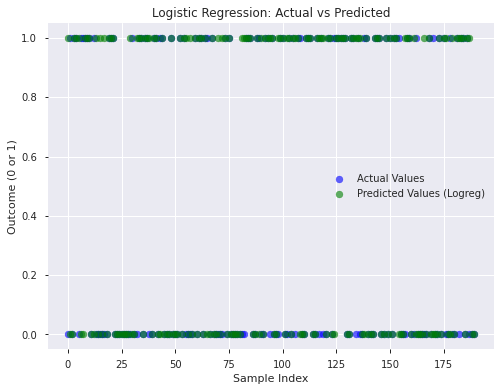

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values', alpha=0.6)
plt.scatter(range(len(y_test_pred_new  )), y_test_pred_new  , color='green', label='Predicted Values (Logreg)', alpha=0.6)
# Add labels and title
plt.title('Logistic Regression: Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Outcome (0 or 1)')
plt.legend()

# Show the plot
plt.show

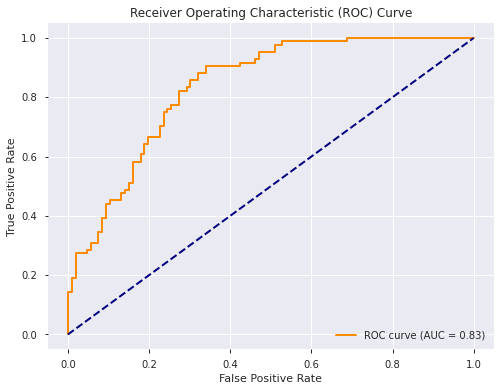

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class
y_test_probs = lg_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)
roc_auc = roc_auc_score(y_test, y_test_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Random Forest Regression  Model

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=0)

Training Accuracy: 93.16%
Test Accuracy: 85.79%
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       106
           1       0.81      0.89      0.85        84

    accuracy                           0.86       190
   macro avg       0.86      0.86      0.86       190
weighted avg       0.86      0.86      0.86       190

Confusion Matrix 
 [[88 18]
 [ 9 75]]


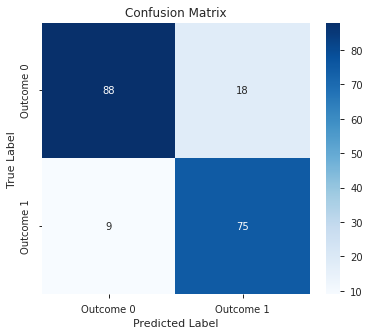

In [52]:
# Initialize and train Random Forest Regression Regression model

# Define and train the model
rf_model = RandomForestClassifier(n_estimators=50,       # Number of trees
    max_depth=10,           # Limits the depth of each tree
    min_samples_split=5,    # Minimum samples required to split a node
    min_samples_leaf=2,     # Minimum samples required in a leaf
    max_leaf_nodes=50,      # Maximum leaf nodes allowed
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Compute accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print results
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(classification_report(y_test, y_test_pred))
# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred )

# Create the heatmap
plt.figure(figsize=(6, 5))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Outcome 0", "Outcome 1"], yticklabels=["Outcome 0", "Outcome 1"])

# Labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
print("Confusion Matrix","\n",cm)
# Explicitly show the plot
plt.show()


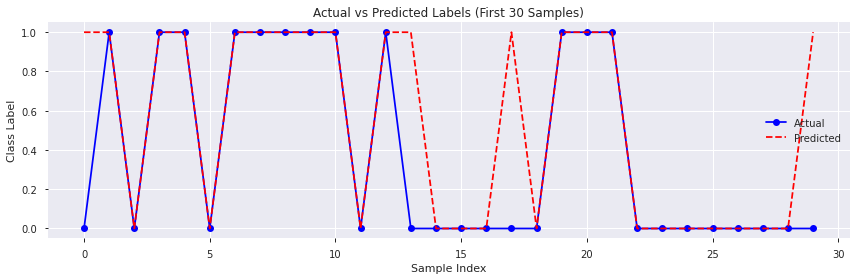

In [53]:
# Plotting Actual vs Predicted Labels
plt.figure(figsize=(12, 4))
plt.plot(y_test.values[:30], label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(y_test_pred[:30], label='Predicted', marker='x', linestyle='--', color='red')

plt.title('Actual vs Predicted Labels (First 30 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

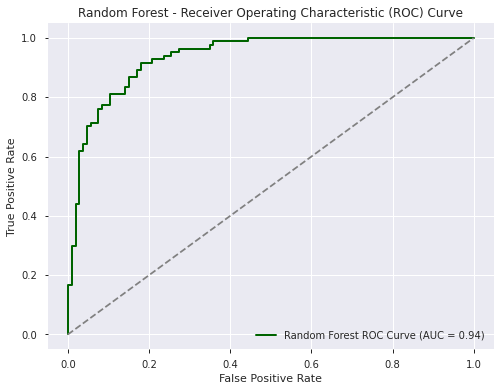

In [54]:
# Get predicted probabilities for the positive class (class 1)
y_test_probs = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)

# Compute AUC score
roc_auc = roc_auc_score(y_test, y_test_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f"Random Forest ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest - Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

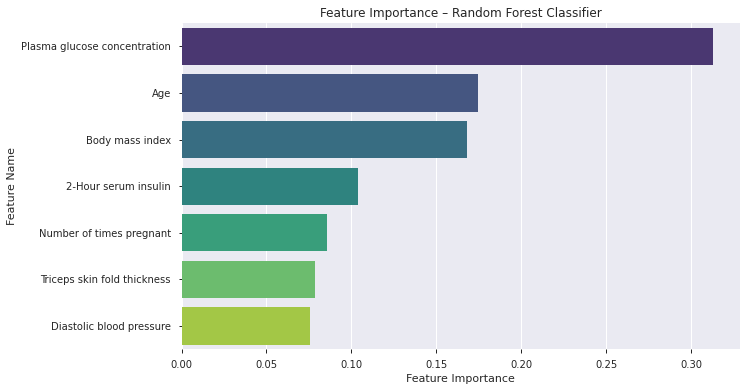

In [120]:
# Extract feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by="Importance", ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance – Random Forest Classifier")
plt.show()

# GridSearch for  Ensemble (Voting)  only (e.g., Logistic + Random Forest)

Test Accuracy: 0.8578947368421053
train Accuracy: 0.9052631578947369
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       106
           1       0.82      0.87      0.84        84

    accuracy                           0.86       190
   macro avg       0.86      0.86      0.86       190
weighted avg       0.86      0.86      0.86       190

Confusion Matrix 
 [[90 16]
 [11 73]]


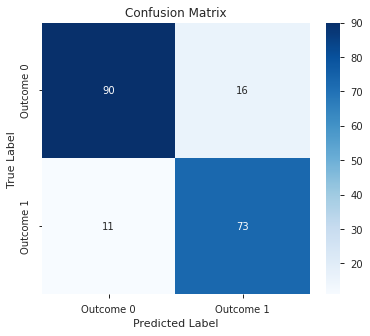

In [37]:

lr = LogisticRegression(max_iter=1000,  random_state=42)
rf = RandomForestClassifier(n_estimators=50,max_depth=10,random_state=42)

# Create the voting classifier
voting_clf = VotingClassifier(
    estimators=[('lr', lr), ('rf', rf)],
    voting='soft'  # or 'hard'
)

# Set up GridSearch parameters
param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [5, 10],
    
}

# Create the GridSearchCV
grid_search = GridSearchCV(estimator=voting_clf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best estimator and evaluation
best_model = grid_search.best_estimator_
y_test_pred1 = best_model.predict(X_test)
y_train_pred1 =best_model .predict(X_train)

print("Test Accuracy:", accuracy_score(y_test,y_test_pred1 ))
print("train Accuracy:", accuracy_score(y_train,y_train_pred1))
print(classification_report(y_test, y_test_pred1))
# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred1)

# Create the heatmap
plt.figure(figsize=(6, 5))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Outcome 0", "Outcome 1"], yticklabels=["Outcome 0", "Outcome 1"])

# Labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
print("Confusion Matrix","\n",cm)
# Explicitly show the plot
plt.show()


# Correlation Matrix

In [ ]:
# Compute correlation matrix
correlation_matrix = data1.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [579]:
pip install pandas-profiling

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
